### Deep Learning - HomeWork 1

#### Importing libraries

In [216]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Perceptron learning algorithm

Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).

In [217]:
# Dataset creation:
def create_dataset(mean1, mean2, margin, N = 1500):

    np.random.seed(42)

    class1_data = np.random.normal(loc=mean1, scale=2, size=(N, 2))
    class2_data = np.random.normal(loc=mean2, scale=2, size=(N, 2))


    # Removing points within the margin:
    distance_1 = class1_data[:, 0] + class1_data[:, 1]
    class1_remove = np.where (distance_1 >= -1 * margin)
    class1_data = np.delete(class1_data, class1_remove, axis = 0)

    distance_2 = class2_data[:, 0] + class2_data[:, 1]
    class2_remove = np.where (distance_2 <= margin)
    class2_data = np.delete(class2_data, class2_remove, axis = 0)

    # Taking 1000 points per class after removing points within the margin
    class1_data = class1_data[:1000, :]
    class2_data = class2_data[:1000, :]

    class1_labels = -1 *np.ones(1000)
    class2_labels = np.ones(1000)

    data = np.concatenate((class1_data, class2_data))
    labels = np.concatenate((class1_labels, class2_labels))

    # shuffling the dataset
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    return class1_data, class2_data, data, labels

The above code creates a dataset. Initially, we sample points from a normal distribution and then we remove points which are within a certain margin of each other. We take 1000 points from both the classes. Finally, we create labels for the dataset, shuffle it and then return it.

In [218]:
def train(dataset, labels, no_epochs):
    np.random.seed(42)
    weights = np.zeros(dataset[0].shape[0] + 1) # initialising the weights and the bias to 0

    # padding 1 to the dataset to account for the bias
    new_dataset = np.ones((dataset.shape[0], dataset.shape[1] + 1))
    new_dataset [:, :-1] = dataset

    for epoch in range(no_epochs):
        no_changes = 0
        for i in range(new_dataset.shape[0]):
            if (np.sum(np.multiply(weights, new_dataset[i])) * labels[i] <= 0):
                weights = weights + new_dataset[i] * labels[i]
                no_changes = no_changes + 1
        # If there are no changes, the perceptron has learnt the training set, so we can break it
        if (no_changes == 0):
            break
    
    return weights, epoch

With $\gamma$ = 0.01

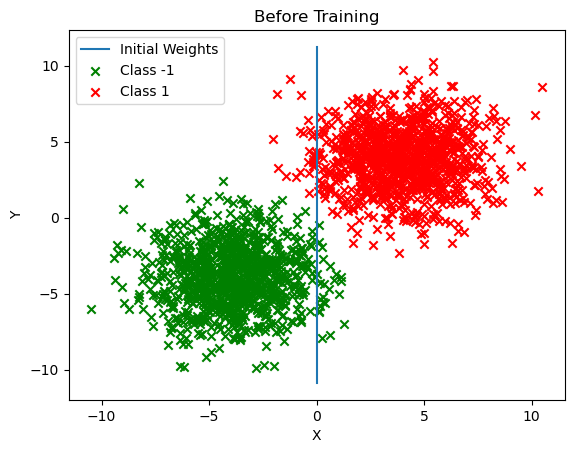

Average number of iterations: 1.41


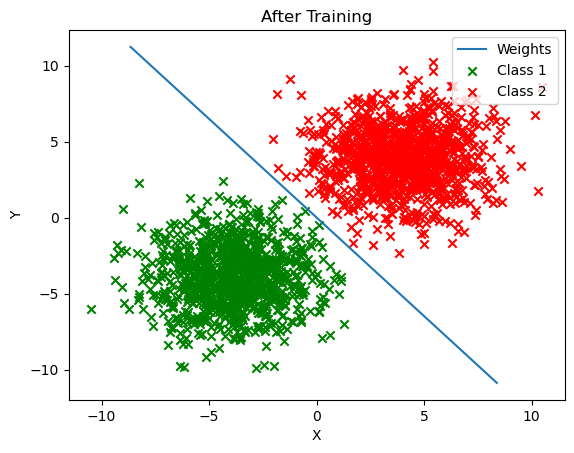

In [219]:
class1_data, class2_data, data, labels = create_dataset((-4, -4), (4, 4), 0.01)

y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -0 * y - 0 # Weights and bias are initialised to 0 in the train function. So, to plot it, we are directly taking 0.

plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

avg_iterations = 0

for i in range (100):
    # shuffling the dataset in each iteration
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    weights, iterations = train(data, labels, 100)
    avg_iterations += iterations

print("Average number of iterations:", avg_iterations/100)

# plotting the dataset with weights of perceptron:
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[1]/weights[0]) * y - (weights[2]/weights[0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('After Training')
plt.legend()
plt.show()

With $\gamma$ = 0.05

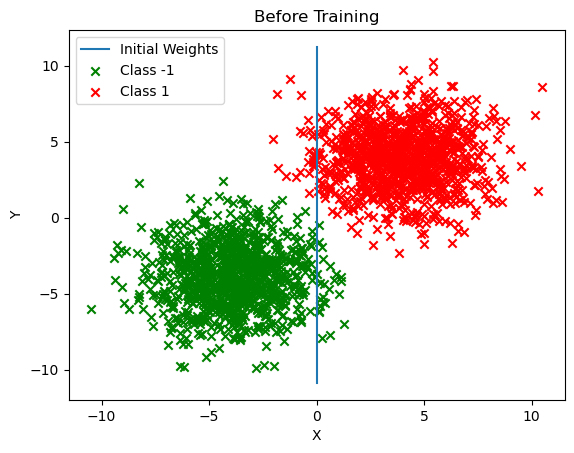

Average number of iterations: 1.15


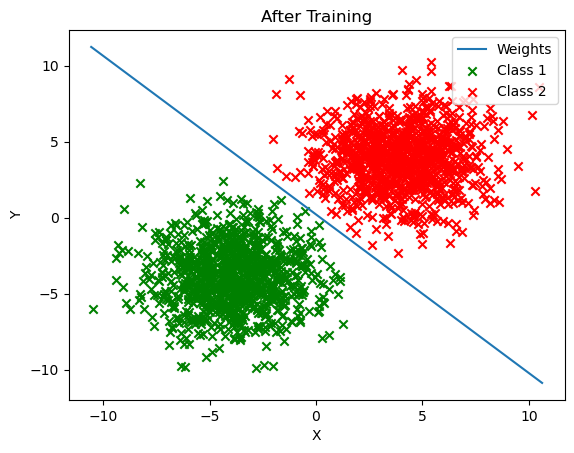

In [220]:
class1_data, class2_data, data, labels = create_dataset((-4, -4), (4, 4), 0.05)

y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -0 * y - 0 # Weights and bias are initialised to 0 in the train function. So, to plot it, we are directly taking 0.

plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

avg_iterations = 0

for i in range (100):
    # shuffling the dataset in each iteration
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    data = data[indices]
    labels = labels[indices]

    weights, iterations = train(data, labels, 100)
    avg_iterations += iterations

print("Average number of iterations:",avg_iterations/100)

# plotting the dataset with weights of perceptron:
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[1]/weights[0]) * y - (weights[2]/weights[0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('After Training')
plt.legend()
plt.show()

With $\gamma$ = 0.1

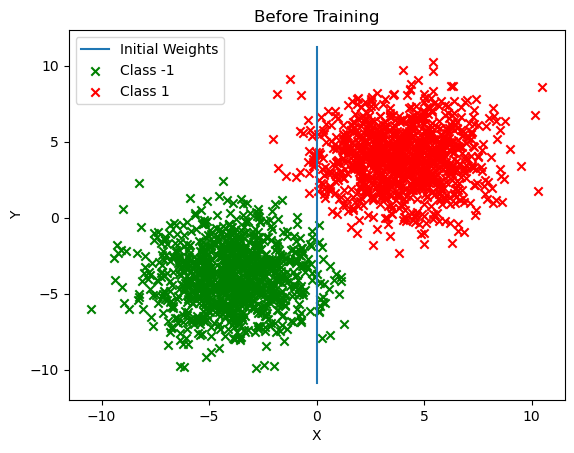

Average number of iterations: 1.05


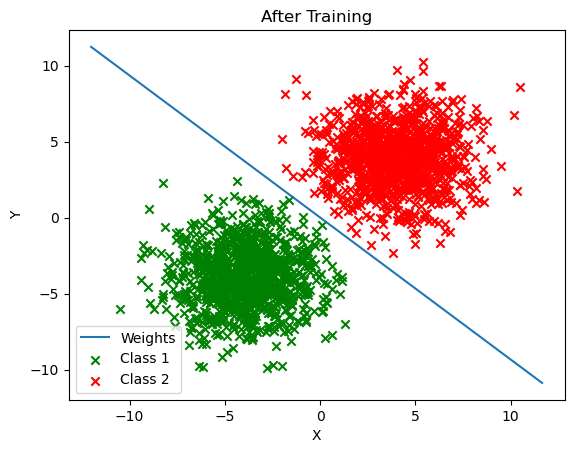

In [221]:
class1_data, class2_data, data, labels = create_dataset((-4, -4), (4, 4), 0.1)

y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -0 * y - 0 # Weights and bias are initialised to 0 in the train function. So, to plot it, we are directly taking 0.
plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

avg_iterations = 0

for i in range (100):
    # shuffling the dataset in each iteration
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    data = data[indices]
    labels = labels[indices]

    weights, iterations = train(data, labels, 100)
    avg_iterations += iterations

print("Average number of iterations:",avg_iterations/100)

# plotting the dataset with weights of perceptron:
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[1]/weights[0]) * y - (weights[2]/weights[0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('After Training')
plt.legend()
plt.show()

With $\gamma$ = 0.5

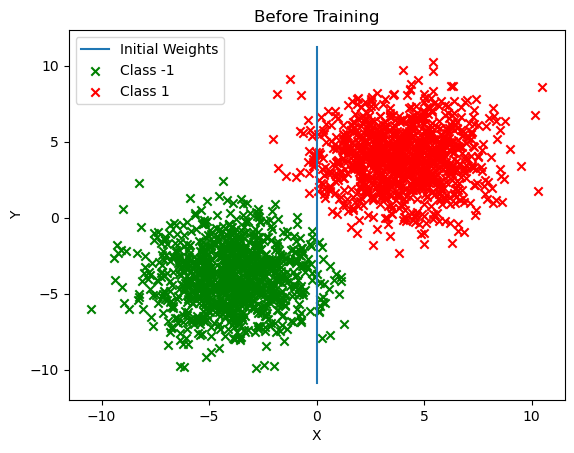

Average number of iterations: 1.03


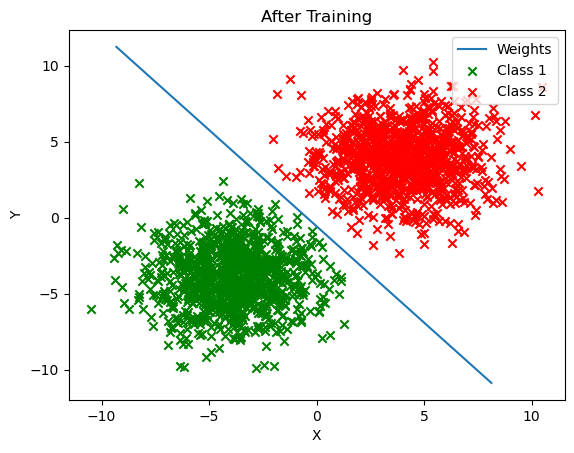

In [222]:
class1_data, class2_data, data, labels = create_dataset((-4, -4), (4, 4), 0.5)

y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -0 * y - 0 # Weights and bias are initialised to 0 in the train function. So, to plot it, we are directly taking 0.
plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

avg_iterations = 0

for i in range (100):
    # shuffling the dataset in each iteration
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    data = data[indices]
    labels = labels[indices]

    weights, iterations = train(data, labels, 100)
    avg_iterations += iterations

print("Average number of iterations:",avg_iterations/100)

# plotting the dataset with weights of perceptron:
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[1]/weights[0]) * y - (weights[2]/weights[0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('After Training')
plt.legend()
plt.show()

With $\gamma$ = 3:

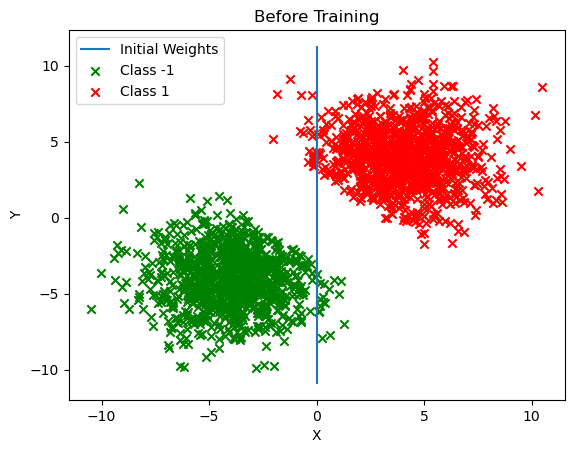

Average number of iterations: 1.0


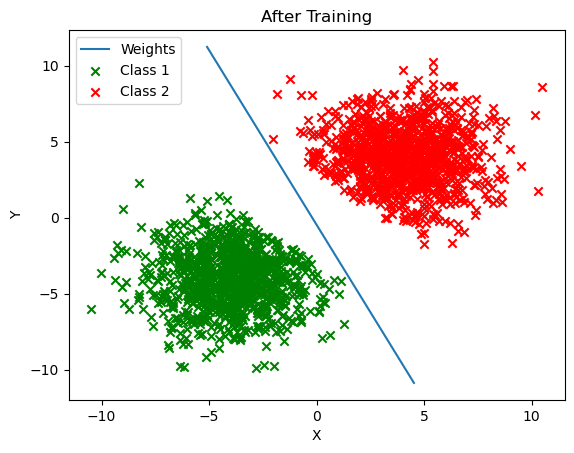

In [223]:
class1_data, class2_data, data, labels = create_dataset((-4, -4), (4, 4), 3)

y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -0 * y - 0 # Weights and bias are initialised to 0 in the train function. So, to plot it, we are directly taking 0.
plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

avg_iterations = 0

for i in range (100):
    # shuffling the dataset in each iteration
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    data = data[indices]
    labels = labels[indices]

    weights, iterations = train(data, labels, 100)
    avg_iterations += iterations

print("Average number of iterations:",avg_iterations/100)

# plotting the dataset with weights of perceptron:
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[1]/weights[0]) * y - (weights[2]/weights[0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('After Training')
plt.legend()
plt.show()

Note: Here we are keeping R constant for all the iterations. Clearly as we are increasing our $\gamma$, the average number of iterations required to converge comes down. Thus, we noticed that k <= $\frac{R^2}{\gamma^2}$

#### 2. Gradient descent for training a linear classifier

Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent update equation. Plot the dataset before and after training (with the classifier).

In [224]:
# Here, we have used the binary cross entropy loss
def loss_function(y_actual, y_pred):
    return - y_actual * np.log(y_pred) - (1 - y_actual) * np.log(1 - y_pred)

# Definition of the sigmoid activation function used
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of binary cross entropy loss
def loss_derivative(y_actual, y_pred, X):
    y_pred = y_pred.T
    return X.dot(y_pred - y_actual)
        

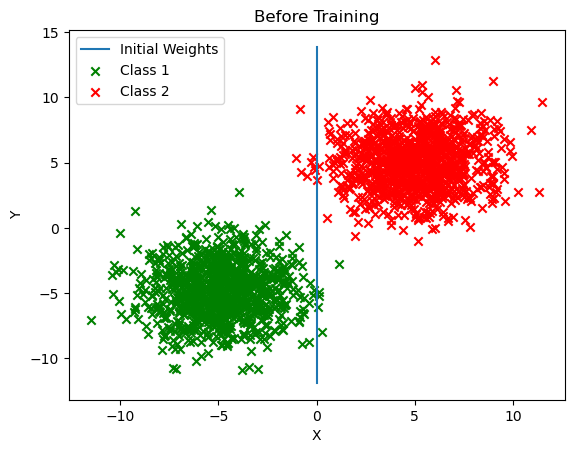

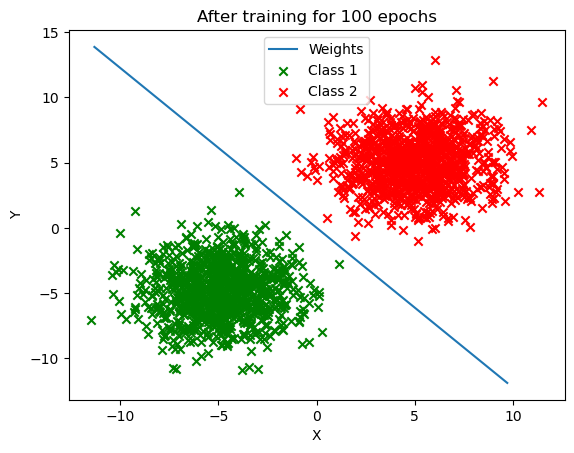

In [225]:
np.random.seed(42)
n_epochs = 100
learning_rate = 0.01

class1_data, class2_data, data, labels = create_dataset((-5, -5), (5, 5), 1, 1000)

# changing labels -1 to 0 to work with binary cross entropy loss
for i in range(len(labels)):
    if (labels[i] == -1):
        labels[i] = 0

weights = np.zeros((1, data[0].shape[0] + 1))
weights[0][0] = 0.1

# padding 1s to the dataset to account for bias
new_dataset = np.ones((data.shape[0], data.shape[1] + 1))
new_dataset [:, :-1] = data
new_dataset = new_dataset.T

labels = labels.reshape((labels.shape[0], 1))

# Initially, the weights are set to 0
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[0][1]/weights[0][0]) * y - (weights[0][2]/weights[0][0])

plt.figure()
plt.plot(x, y, label = "Initial Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Before Training')
plt.legend()
plt.show()

for epoch in range(n_epochs):
    loss_grad = (1 / new_dataset.shape[1]) * np.squeeze(loss_derivative(labels, sigmoid(weights.dot(new_dataset)), new_dataset))
    weights = weights - learning_rate * loss_grad

# Weights after training   
y = np.linspace(np.amin(data[:, 1]) - 1, np.amax(data[:, 1]) + 1, 500)
x = -(weights[0][1]/weights[0][0]) * y - (weights[0][2]/weights[0][0])

plt.figure()
plt.plot(x, y, label = "Weights")
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2', marker='x', color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('After training for ' + str(epoch + 1) + ' epochs')
plt.legend()
plt.show()

#### 3. MLP with a single hidden layer

Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden layer for classifying the same. You may use the loss function used in problem 2. You have to implement the backpropagation algorithm yourself.

In [226]:
# Dataset Creation

def create_nonlinear_dataset(radius0, radius1, N = 1000):
    np.random.seed(42)

    # generating class 0 data
    x0 = np.random.uniform(-1.1 * radius0, 1.1 * radius0, N)

    # Removing points which has greater radius than the actual radius
    mask = x0 > radius0
    x0[mask] = radius0
    mask = x0 < -radius0
    x0[mask] = -radius0

    # Generating y coordinates and stacking
    y0 = np.sqrt(radius0 ** 2 - x0 ** 2)
    y0[:N//2] *= -1
    class0_data = np.column_stack((x0, y0))

    # generating class 1 data
    x1 = np.random.uniform(-1.1 * radius1, 1.1 * radius1, N)

    # Removing points which has greater radius than the actual radius
    mask = x1 > radius1
    x1[mask] = radius1
    mask = x1 < -radius1
    x1[mask] = -radius1

    # Generating y coordinates and stacking
    y1 = np.sqrt(radius1 ** 2 - x1 ** 2)
    y1[:N//2] *= -1

    class1_data = np.column_stack((x1, y1))

    plt.scatter(class0_data[:, 0], class0_data[:, 1], label='Class 0', marker='x', color = 'red')
    plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1', marker='x', color = 'green')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Non-linear Dataset')
    plt.legend()
    plt.show()

    class0_labels = np.zeros(N)
    class1_labels = np.ones(N)

    data = np.concatenate((class0_data, class1_data))
    labels = np.concatenate((class0_labels, class1_labels))

    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    data = data[indices]
    labels = labels[indices]

    return class0_data, class1_data, data, labels

    

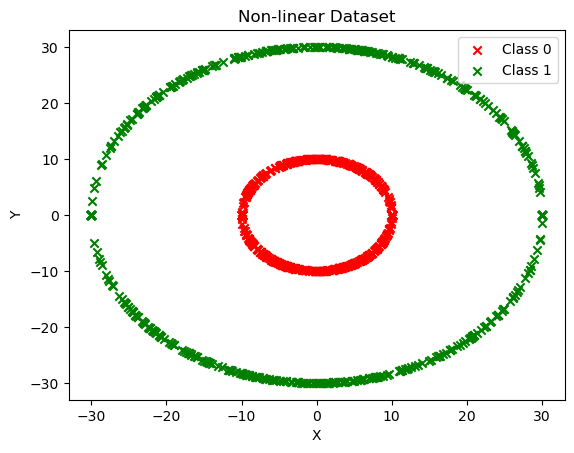

Epoch: 0 : 0.7088167458480807
Epoch: 1 : 0.7068500097117876
Epoch: 2 : 0.7050737874444009
Epoch: 3 : 0.7034520722573392
Epoch: 4 : 0.7019592089291827
Epoch: 5 : 0.7005764711982707
Epoch: 6 : 0.6992896678067388
Epoch: 7 : 0.6980875322487377
Epoch: 8 : 0.6969606870040825
Epoch: 9 : 0.695901006426181
Epoch: 10 : 0.6949012396168981
Epoch: 11 : 0.6939547924586378
Epoch: 12 : 0.6930556012459892
Epoch: 13 : 0.6921980559824579
Epoch: 14 : 0.6913769491105035
Epoch: 15 : 0.6905874366438502
Epoch: 16 : 0.6898250052551027
Epoch: 17 : 0.6890854424917083
Epoch: 18 : 0.688364809146976
Epoch: 19 : 0.6876594136738738
Epoch: 20 : 0.686965788859552
Epoch: 21 : 0.6862806710384756
Epoch: 22 : 0.6856009820539268
Epoch: 23 : 0.6849238140605904
Epoch: 24 : 0.6842464171456555
Epoch: 25 : 0.6835661896743217
Epoch: 26 : 0.6828806712802573
Epoch: 27 : 0.6821875385655853
Epoch: 28 : 0.6814846038852089
Epoch: 29 : 0.6807698180857826
Epoch: 30 : 0.6800412787401675
Epoch: 31 : 0.679297246216257
Epoch: 32 : 0.67853617

In [227]:
# One layer MLP
class MultiLayerPerceptron:

    def __init__(self, input_dim, hidden_dim, output_dim):
        np.random.seed(42)
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.W1 = np.random.uniform (-0.5, 0.5, (hidden_dim, input_dim))
        self.b1 = np.random.randn (hidden_dim, 1)
        self.W2 = np.random.uniform (-0.5, 0.5, (output_dim, hidden_dim))
        self.b2 = np.random.randn (output_dim)
    
    def forward(self, input):
        self.hidden = sigmoid (self.W1.dot (input) + self.b1)
        self.output = sigmoid (self.W2.dot (self.hidden) + self.b2)
        return self.output

    def backpropagation(self, y_pred, y_act, input):
        # Here, we try to compute the gradient of loss wrt the weights and bias of the output layer
        self.dL_W2= np.zeros((self.output_dim,self.hidden_dim,input.shape[1]))
        self.dL_b2 = np.zeros((self.output_dim, input.shape[1]))

        for k in range(input.shape[1]):
            for j in range(self.hidden_dim):
                for i in range(self.output_dim):
                    self.dL_W2[i][j][k]=self.hidden[j][k]*(-y_act[0][k]+y_pred[0][k])
                    self.dL_b2[i][k] = (-y_act[0][k]+y_pred[0][k])

        self.dL_W2= np.sum(self.dL_W2, axis=2)
        self.dL_b2 = np.sum(self.dL_b2, axis = 1) 

        # Here, we try to compute the gradient of the loss wrt the weights and bias of the hidden layer
        self.dL_W1= np.zeros((self.hidden_dim,self.input_dim,input.shape[1]))
        self.dL_b1 = np.zeros((self.hidden_dim, input.shape[1]))

        for k in range(input.shape[1]):
            for j in range(self.input_dim):
                for i in range(self.hidden_dim):
                    self.dL_W1[i][j][k]=self.hidden[i][k] * (1 - self.hidden[i][k]) * self.W2[0][i]*(-y_act[0][k]+y_pred[0][k]) * input [j][k]
                    self.dL_b1[i][k] = self.hidden[i][k] * (1 - self.hidden[i][k]) * self.W2[0][i]*(-y_act[0][k]+y_pred[0][k])

        self.dL_W1= np.sum(self.dL_W1, axis=2)
        self.dL_b1 = np.sum(self.dL_b1, axis = 1, keepdims = True)
        

    def update_weights(self, learning_rate):
        # We update the parameters by gradient descent
        self.W1 = self.W1 - learning_rate*self.dL_W1
        self.W2 = self.W2 - learning_rate*self.dL_W2
        self.b2 = self.b2 - learning_rate*self.dL_b2
        self.b1 = self.b1 - learning_rate*self.dL_b1

    def train(self, learning_rate, no_epochs, input, labels):
        # Training the MLP
        loss = []
        for epoch in range(no_epochs):
            y_pred = self.forward(input)
            self.backpropagation(y_pred, labels, input)
            self.update_weights(learning_rate)
            print("Epoch:", epoch, ":", np.sum(loss_function(labels, y_pred)/input.shape[1]))
            loss.append(np.sum(loss_function(labels, y_pred)/input.shape[1]))
        return loss

class1_data, class2_data, data, labels = create_nonlinear_dataset(10, 30, 500)
MLP = MultiLayerPerceptron(input_dim = 2, hidden_dim = 7, output_dim = 1)
data = data.T
labels = labels.reshape((1, labels.shape[0]))

loss = MLP.train(2.6e-4, 1000, data, labels)

Inorder to test our algorithm, we pass the train set to the model with the updated weights.

Incorrect: 0


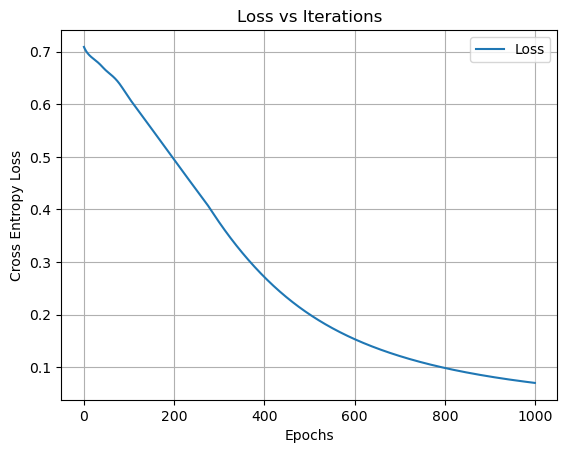

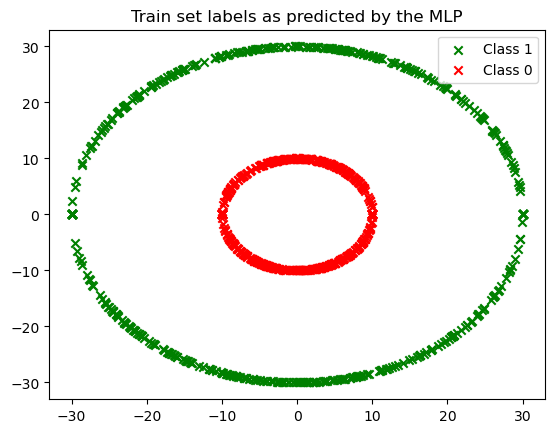

In [228]:
output = MLP.forward(data)

incorrect = 0
class1 = []
class0 = []
data_new = data.T
for i in range(output.shape[1]):
    if output[0][i] > 0.5:
        class1.append(data_new[i])
        if (labels[0][i] != 1):
            incorrect += 1
        output[0][i] = 1
    else:
        class0.append(data_new[i])
        if (labels[0][i] != 0):
            incorrect += 1
        output[0][i] = 0
print("Incorrect:", incorrect)

plt.figure()
plt.plot(loss, label = 'Loss')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.scatter(np.array(class1)[:, 0], np.array(class1)[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(np.array(class0)[:, 0], np.array(class0)[:, 1], label='Class 0', marker='x', color = 'red')
plt.title("Train set labels as predicted by the MLP")
plt.legend()
plt.show()

To get a better idea of how our model learns, we create a meshgrid to visualise the descision boundary of the MLP.

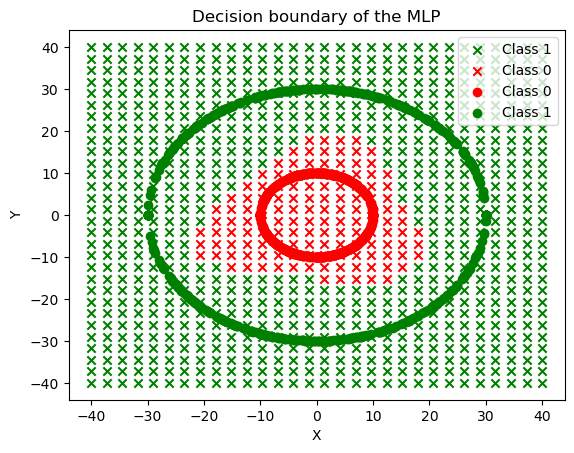

In [229]:
x_values = np.linspace(-40, 40, 30)
y_values = np.linspace(-40, 40, 30)

# Create a mesh grid
x, y = np.meshgrid(x_values, y_values)

mesh_array = np.column_stack((x.ravel(), y.ravel()))
mesh_array = mesh_array.T

output = MLP.forward(mesh_array)
mesh_array = mesh_array.T
class1 = []
class0 = []
for i in range(output.shape[1]):
    if output[0][i] > 0.5:
        class1.append(mesh_array[i])
        output[0][i] = 1
    else:
        class0.append(mesh_array[i])
        output[0][i] = 0

plt.figure()
plt.scatter(np.array(class1)[:, 0], np.array(class1)[:, 1], label='Class 1', marker='x', color = 'green')
plt.scatter(np.array(class0)[:, 0], np.array(class0)[:, 1], label='Class 0', marker='x', color = 'red')

plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 0', marker='o', color = 'red')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', marker='o', color = 'green')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision boundary of the MLP")
plt.legend()
plt.show()